In [1]:
#importing basic libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import load_wine

In [3]:
data = load_wine()

In [4]:
data

{'data': array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
         1.065e+03],
        [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
         1.050e+03],
        [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
         1.185e+03],
        ...,
        [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
         8.350e+02],
        [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
         8.400e+02],
        [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
         5.600e+02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

In [5]:
df = pd.DataFrame(data=data['data'],columns=data['feature_names'])

In [6]:
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


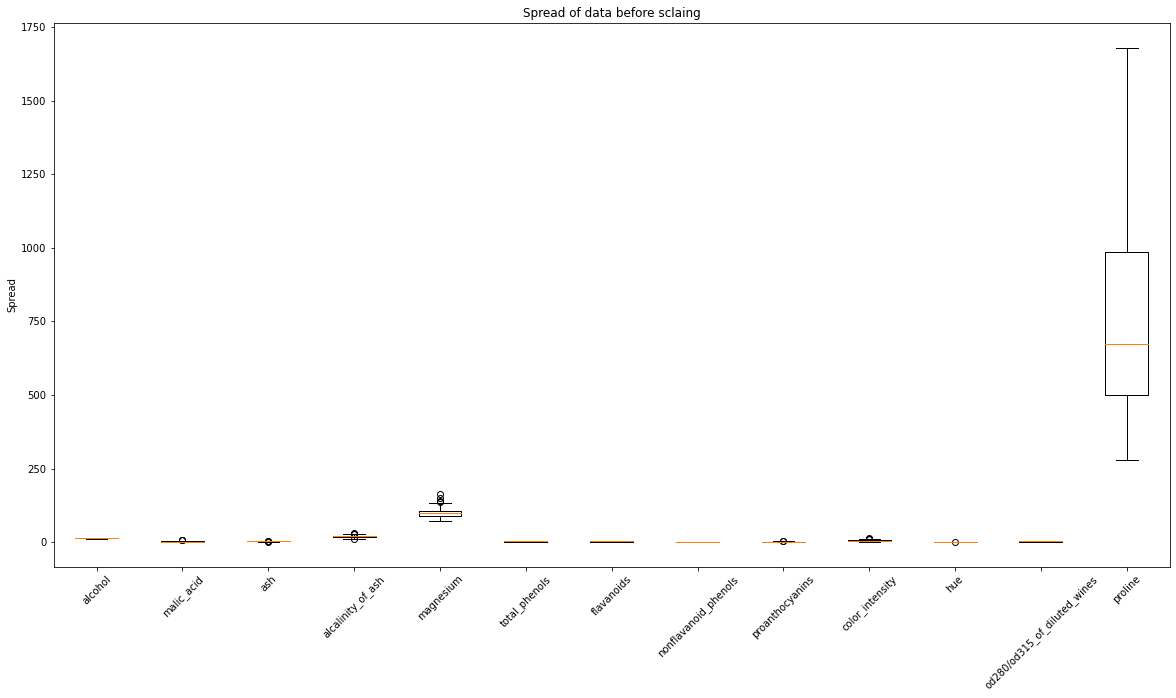

In [7]:
#making box plot for all features on same scale
plt.figure(figsize=(20,10))
plt.boxplot(x=df,labels=df.columns)
plt.xticks(rotation=45);
plt.title('Spread of data before sclaing')
plt.ylabel('Spread');

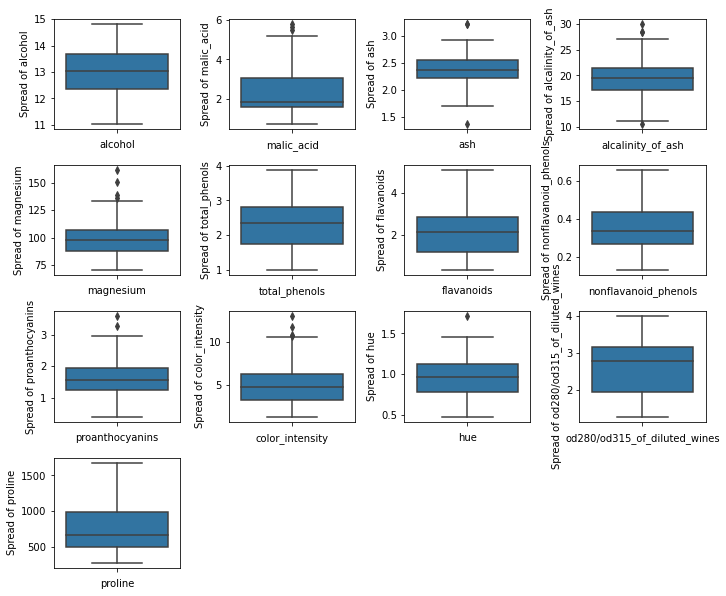

In [8]:
#spread of individual columns
plt.figure(figsize=(10,10))

for i,j in enumerate(df.columns):
    plt.subplot(5,4,i+1)
    sns.boxplot(y=df[j])
    plt.xlabel(j)
    plt.ylabel(f'Spread of {j}')
    
plt.tight_layout()
plt.show()

In [9]:
#checking null values
df.isna().sum()

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
dtype: int64

In [10]:
#defining X and y
X= df.copy()
y= data['target']

In [11]:
#making train test split
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test= train_test_split(X,y,random_state=42,test_size=.2)

In [12]:
#importing scaling function
from sklearn.preprocessing import MinMaxScaler,StandardScaler

In [13]:
min_max_scaler=MinMaxScaler()

X_train_min_max=min_max_scaler.fit_transform(X_train)
X_test_min_max=min_max_scaler.transform(X_test)

In [14]:
standard_scaler = StandardScaler()

X_train_standard = standard_scaler.fit_transform(X_train)
X_test_standard = standard_scaler.transform(X_test)

In [15]:
df_min_max = pd.DataFrame(data=X_train_min_max,columns=df.columns)

In [16]:
df_min_max.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,0.871053,0.160896,0.716578,0.742268,0.304348,0.627586,0.204641,0.754717,0.721519,1.000000,0.073171,0.252747,0.301024
1,0.394737,0.940937,0.684492,0.742268,0.282609,0.279310,0.054852,0.943396,0.215190,0.289520,0.276423,0.153846,0.186761
2,0.352632,0.036660,0.395722,0.407216,0.195652,0.875862,0.719409,0.207547,0.484177,0.245115,0.455285,0.549451,0.301024
3,0.644737,0.158859,0.684492,0.613402,0.206522,0.558621,0.160338,0.735849,0.591772,0.888988,0.073171,0.186813,0.269504
4,0.536842,0.124236,0.395722,0.252577,0.304348,0.489655,0.485232,0.283019,0.300633,0.174067,0.569106,0.520147,0.584712


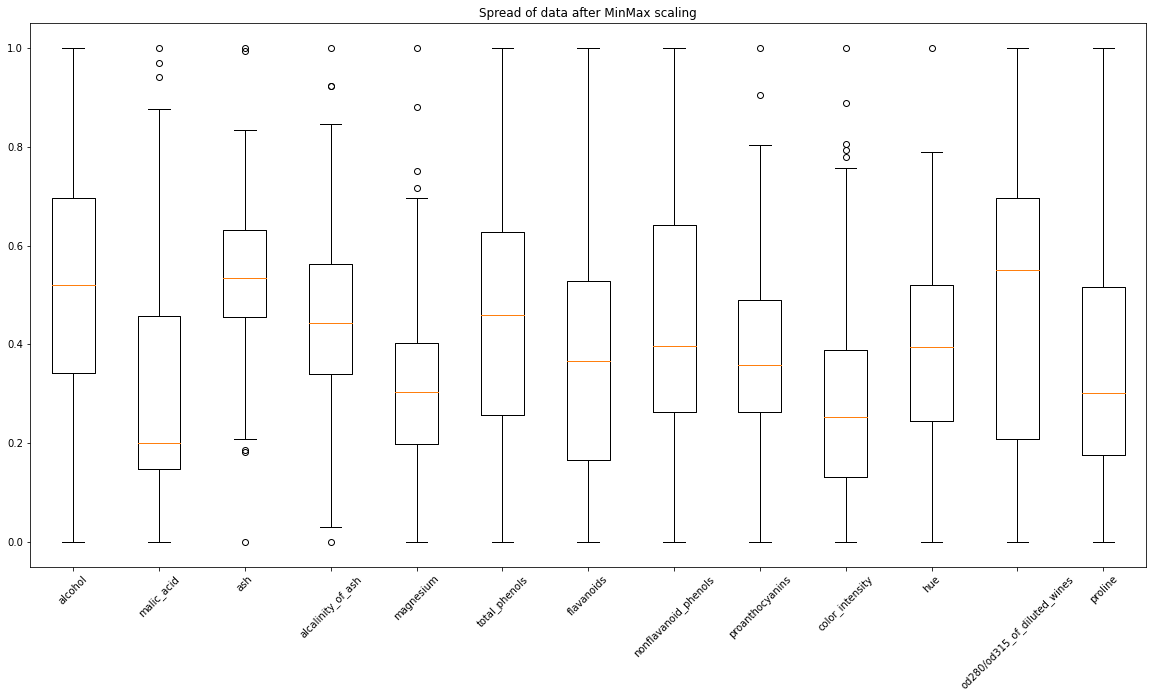

In [17]:
#making box plot for all features after min max scaling
plt.figure(figsize=(20,10))
plt.boxplot(x=df_min_max,labels=df_min_max.columns)
plt.xticks(rotation=45)
plt.title('Spread of data after MinMax scaling');

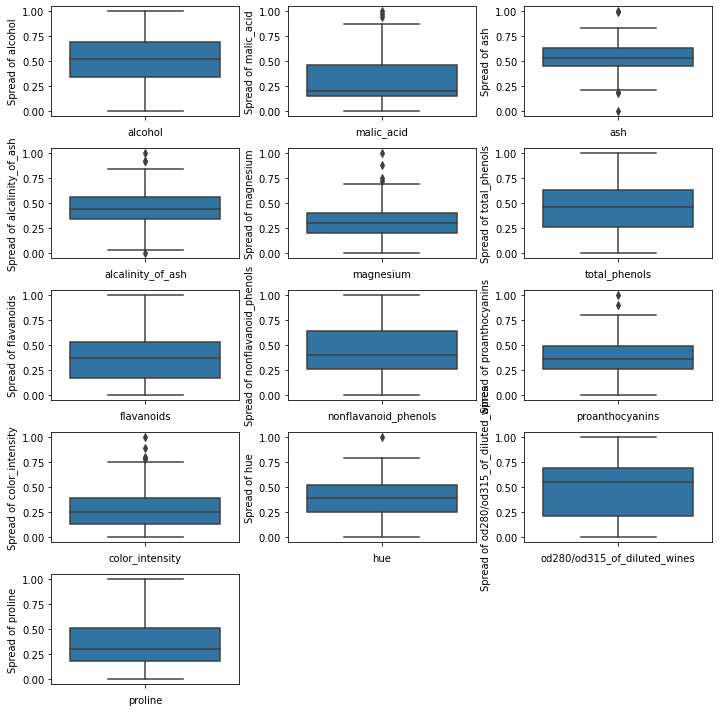

In [18]:
#spread of individual columns after min max scaling
plt.figure(figsize=(10,10))

for i,j in enumerate(df_min_max.columns):
    plt.subplot(5,3,i+1)
    sns.boxplot(y=df_min_max[j])
    plt.xlabel(j)
    plt.ylabel(f'Spread of {j}')
    
plt.tight_layout()
plt.show()

In [19]:
df_standard = pd.DataFrame(data=X_train_standard,columns=df.columns)

In [20]:
df_standard.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,1.665293,-0.608406,1.218962,1.605400,-0.167384,0.804002,-0.691678,1.267226,1.877540,3.419473,-1.656329,-0.879409,-0.248606
1,-0.549525,2.751541,1.003315,1.605400,-0.304379,-0.785384,-1.401233,2.049600,-0.873505,-0.024801,-0.584633,-1.254621,-0.729922
2,-0.745310,-1.143541,-0.937507,-0.282704,-0.852357,1.937029,1.746791,-1.001659,0.587987,-0.240068,0.358460,0.246227,-0.248606
3,0.612948,-0.617179,1.003315,0.879206,-0.783860,0.489272,-0.901547,1.188988,1.172585,2.881305,-1.656329,-1.129550,-0.381383
4,0.111249,-0.766315,-0.937507,-1.154137,-0.167384,0.174542,0.637487,-0.688710,-0.409266,-0.584496,0.958609,0.135053,0.946386


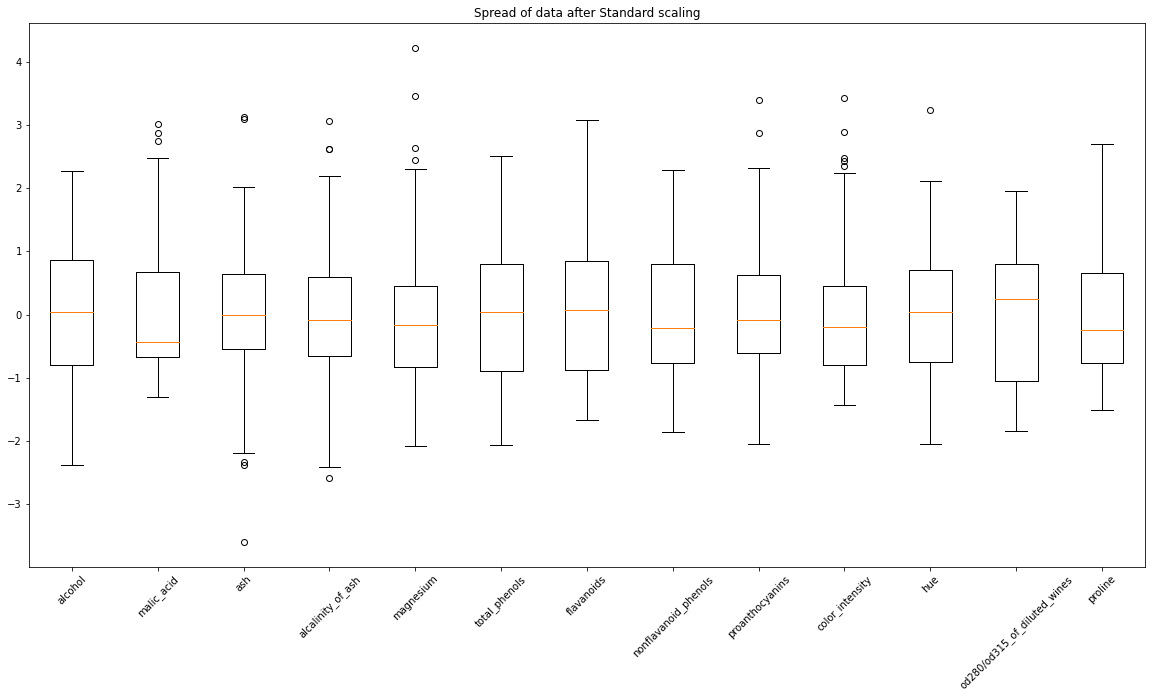

In [21]:
#making box plot for all features after standard scaling
plt.figure(figsize=(20,10))
plt.boxplot(x=df_standard,labels=df_standard.columns)
plt.xticks(rotation=45)
plt.title('Spread of data after Standard scaling');

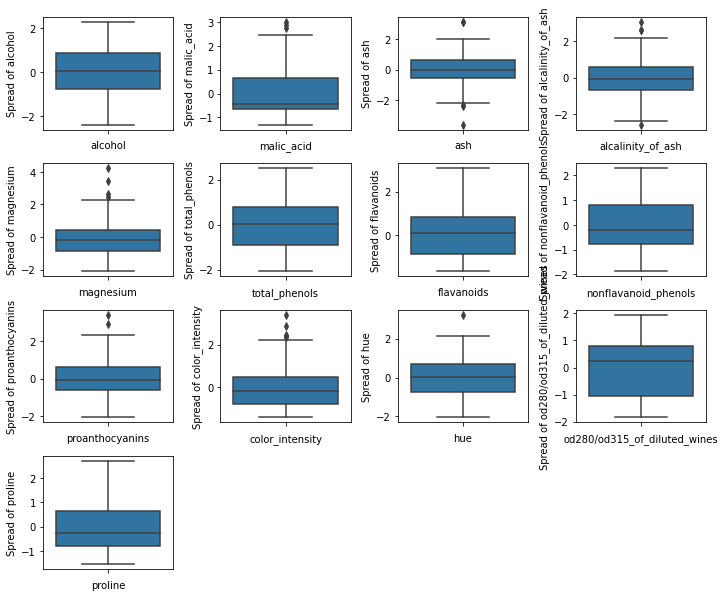

In [22]:
#spread of individual columns after standard scaling
plt.figure(figsize=(10,10))

for i,j in enumerate(df_standard.columns):
    plt.subplot(5,4,i+1)
    sns.boxplot(y=df_standard[j])
    plt.xlabel(j)
    plt.ylabel(f'Spread of {j}')
    
plt.tight_layout()
plt.show()

In [23]:
#importing models which perform better on scaled data and which does not requires scaling
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor

In [24]:
model_RF_1 = RandomForestRegressor()
model_KNN_1 = KNeighborsRegressor()

In [25]:
#training both models with default parameters on unscaled data and comparing RMSE

#defining a function what will do all task


In [26]:
from sklearn.metrics import mean_squared_error

In [27]:
def model(model,X_train,y_train,X_test,y_test):
    """
    Give model as the algorithm which needs to be used,X_train and y_train is training data and X_test and y_test are
    testing data
    """
    
    model.fit(X_train,y_train)
    
    y_preds = model.predict(X_test)
    
    RMSE = np.sqrt(mean_squared_error(y_test,y_preds))
    
    return RMSE

In [28]:
#rmse of RF on unscaled data
rmse_RF_1 = model(model=model_RF_1,X_train=X_train,y_train=y_train,X_test=X_test,y_test=y_test)
rmse_RF_1

0.2394205969047405

In [29]:
#rmse of KNN on unscaled data
rmse_KNN_1 = model(model=model_KNN_1,X_train=X_train,y_train=y_train,X_test=X_test,y_test=y_test)
rmse_KNN_1

0.5385164807134504

In [30]:
#rmse of RF on min max scaled data
rmse_RF_2 = model(model=model_RF_1,X_train=X_train_min_max,y_train=y_train,X_test=X_test_min_max,y_test=y_test)
rmse_RF_2

0.2520526840871875

In [31]:
#rmse of KNN on min max scaled data
rmse_KNN_2 = model(model=model_KNN_1,X_train=X_train_min_max,y_train=y_train,X_test=X_test_min_max,y_test=y_test)
rmse_KNN_2

0.17320508075688773

In [32]:
#rmse of RF on standard scaled data
rmse_RF_3 = model(model=model_RF_1,X_train=X_train_standard,y_train=y_train,X_test=X_test_standard,y_test=y_test)
rmse_RF_3

0.2728450923957484

In [33]:
#rmse of KNN on standard scaled data
rmse_KNN_3 = model(model=model_KNN_1,X_train=X_train_standard,y_train=y_train,X_test=X_test_standard,y_test=y_test)
rmse_KNN_3

0.17638342073763938

In [34]:
#Plotting rmse's of RF and KNN

In [35]:
rmse_RF= {'Unscaled_data' : rmse_RF_1,
         'Min Max Scaled data' : rmse_RF_2,
         'Standard Scaled data' : rmse_RF_3}

In [36]:
rmse_KNN= {'Unscaled_data' : rmse_KNN_1,
         'Min Max Scaled data' : rmse_KNN_2,
         'Standard Scaled data' : rmse_KNN_3}

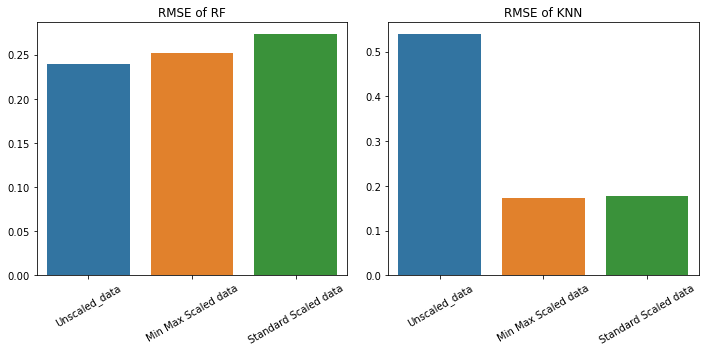

In [37]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.barplot(x=list(rmse_RF.keys()),y=list(rmse_RF.values()))
plt.title("RMSE of RF")
plt.xticks(rotation=30)
plt.grid(False)

plt.subplot(1,2,2)
sns.barplot(x=list(rmse_KNN.keys()),y=list(rmse_KNN.values()))
plt.title("RMSE of KNN")
plt.xticks(rotation=30)
plt.grid(False)

plt.tight_layout()
plt.show();

Conclusion: 
RF algorithm is made of large number of DecisionTrees which works on splitting the features into various trees hence they are not impacted by scaling whereas KNN algorith is based on distance calculation which is very much impacted by scaling. This can be seen from above barplots


